In [1]:
import numpy as np
import pandas as pd
comment_text = pd.read_csv('Sample_labaled_data.csv')
comment_text.head(10)

,Unnamed: 0,id,comment_text,toxic
0,5,0001ea8717f6de06,Thank you for understanding I think very highl...,no
1,7,000247e83dcc1211,Dear god this site is horrible,no
2,11,0002f87b16116a7f,Somebody will invariably try to add Religion ...,no
3,13,0003e1cccfd5a40a,It says it right there that it IS a type The...,no
4,14,00059ace3e3e9a53,Before adding a new product to the list mak...,no
5,16,000663aff0fffc80,this other one from 1897,no
6,17,000689dd34e20979,Reason for banning throwing This article ne...,no
7,19,000844b52dee5f3f,blocked from editing Wikipedia,no
8,21,00091c35fa9d0465,Arabs are committing genocide in Iraq but no ...,yes
9,22,000968ce11f5ee34,Please stop If you continue to vandalize Wikip...,no


In [2]:
toxic_comments=comment_text.loc[comment_text["toxic"]=="yes"]
comment_text.head(5)

,Unnamed: 0,id,comment_text,toxic
0,5,0001ea8717f6de06,Thank you for understanding I think very highl...,no
1,7,000247e83dcc1211,Dear god this site is horrible,no
2,11,0002f87b16116a7f,Somebody will invariably try to add Religion ...,no
3,13,0003e1cccfd5a40a,It says it right there that it IS a type The...,no
4,14,00059ace3e3e9a53,Before adding a new product to the list mak...,no


In [2]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from googleapiclient.discovery import build

import json

comment_text = pd.read_csv('Sample_labaled_data.csv')

comment_text = comment_text.head(100)
def get_toxicity_score(comment):
    
    API_KEY = 'my-api-key'
    
    client = build(
    "commentanalyzer"
    "v1alpha1",
    developerKey=API_KEY,
    discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
    static_discovery=False,
    version=2.0,
    )
    
    analyze_request = {
    'comment': {'text' : comment }, 
    'requestedAttributes': {'TOXICITY': {}}
    }
    
    response = client.comments().analyze(body=analyze_request).execute()
    toxicity_score = response["attributeScores"]["TOXICITY"]["summaryScore"]["value"]
    
    return toxicity_score

toxicity_scores = []
for index, row in comment_text.iterrows():
    comment = row['comment_text']
    try:
      score = get_toxicity_score(comment)
    except:
      score = 0
      print(comment)
    toxicity_scores.append(score)
comment_text['toxicity_score'] = toxicity_scores
comment_text

Puwersa ng Masa
aapn bhtla aanand jhala
Vandalism  Hello Barbara   It appears you have a long history of vandalism and after another incident I am afraid I have no choice but to request a permanent ban from administrators I wish you good luck for the future
All the other DAPs have similar links and no one has complained
 Hands off my noobs P   Its not that Im particularly concerned about the loss of  but did you really need to step in and hardblock there  I saw the test edits I saw the username that while not violating any particular part of policy managed to be an astoundingly bad choice of username anyway I responded to these issues with the warning I felt was appropriate feeling that the user could have a second chance under a less moronic username  Yes I am more patient with newbies who screw up than you are We can each have our own approach to adminship But I dont unblock and warn noobs youve just hardblocked so how about you dont hardblock noobs Ive just warned  And if this was j

,Unnamed: 0,id,comment_text,toxic,toxicity_score
0,5,0001ea8717f6de06,Thank you for understanding I think very highl...,no,0.016210
1,7,000247e83dcc1211,Dear god this site is horrible,no,0.401485
2,11,0002f87b16116a7f,Somebody will invariably try to add Religion ...,no,0.432304
3,13,0003e1cccfd5a40a,It says it right there that it IS a type The...,no,0.050821
4,14,00059ace3e3e9a53,Before adding a new product to the list mak...,no,0.027089
...,...,...,...,...,...
95,253,006f1b719aa6010b,Two short stories The list of works contain...,no,0.000000
96,254,007009b9d4b62e19,May 2015,no,0.000000
97,258,0071940212267fea,Well it sucks to have a university to be nickn...,yes,0.000000
98,259,0072b9c3697ab8cc,Argh Some random idiot deleted the whole Ja...,yes,0.000000


#This shows phrases with the highest toxcity scores out of the sampled data

    toxicity_score                                       comment_text
25        0.924899  I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...
36        0.877870  No he is an arrogant self serving immature idi...
8         0.718943   Arabs are committing genocide in Iraq but no ...
34        0.572199  How dare you vandalize that page about the HMS...
71        0.571686                            WHAT THE HELL    Justin
51        0.519808  This is just bizarre Ani Medjools abuse of wik...
80        0.457611       Confusion upon Globus   Shouldnt we menti...
75        0.457547  The specific page linked to is just junk in re...
11        0.457482              Jews are not a race because you ca...
79        0.457030  Buffoon Synonyms    bozo buffo clown comedian ...


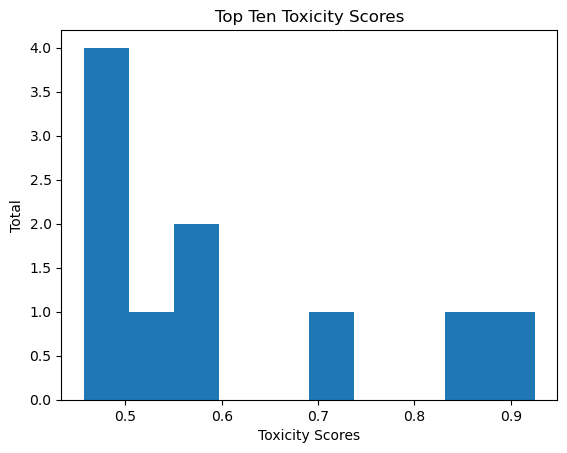

In [4]:
import matplotlib.pyplot as plt
query = comment_text.nlargest(10, 'toxicity_score')
df = pd.DataFrame({'toxicity_score': query['toxicity_score'], 'comment_text': query['comment_text']})
print(df)
plt.title('Top Ten Toxicity Scores')
plt.hist(query['toxicity_score'])
plt.xlabel('Toxicity Scores')
plt.ylabel('Total')
plt.show()

#Here I am testing whether a specific writing style concerning any words to do with culture, to see if it affects the score.

In [ ]:
get_toxicity_score("I will burn you to HELL?if you revoke my talk ")

#Taking out the term Arabs from the statement significantly reduced the score, this suggest that the viewpoint API has a bias towards words associated with culture.

In [ ]:
get_toxicity_score("Arabs are committing genocide in Iraq")

#By taking out the culture associated word, the score reduces. 

In [ ]:
get_toxicity_score("People are committing genocide in Iraq")

In [ ]:
get_toxicity_score("Humans are committing genocide in Iraq")

#You can see that using words with a stronger cultural emphasis will also increase your score.

In [ ]:
get_toxicity_score("Muslims are committing genocide in Iraq")

In [ ]:
get_toxicity_score("christians are committing genocide in Iraq")

#This shows phrases with the top 50 lowest toxcity scores out of the sampled data.

In [ ]:
query = comment_text.nsmallest(51, 'toxicity_score')
df = pd.DataFrame({'toxicity_score': query['toxicity_score'], 'comment_text': query['comment_text']})
print(df)


#Here I tested whether or not changing the formality of phrases affects the toxicity score. I used such writing styles as, formal, Informal, Conversational, and Persuasive to see if that would increase toxicity score. When doing this I used phases with already high toxicity rating as I believe changing the formality in these phrases would have the biggest impact. 

#Original style

In [10]:
get_toxicity_score ("Dear god this site is horrible") 

0.4014846

#Formal style

In [11]:
get_toxicity_score ("Dear to who it may concern,this website is horrible") 

0.4014846

#Informal style

In [12]:
get_toxicity_score("Honestly, this website is just terrible.")

0.37694603

#Conversational style

In [13]:
get_toxicity_score("You know what, this website is just plain horrible.")

0.43230394

In [ ]:
#Persuasive style

In [14]:
get_toxicity_score("Trust me, this website desperately needs improvement ")

0.040430736

In [ ]:
#Here I tested how spaces,profanity and commas. To see how these factors will affect the score.

In [24]:
get_toxicity_score("Halliday Good to see another contributor ")

0.011623607

In [23]:
get_toxicity_score("Halliday   Good to   see    another contributor ")

0.009236055

I added a comma to see how it would affect the score.

In [ ]:
get_toxicity_score("Halliday, Its finally good to see another contributor ")

I changed the phrase to have more profanity to see the impact of using such words. 

In [ ]:
get_toxicity_score("Halliday!! fucken finally, its good to see another contributor")

#Here Im testing if phrases in lower or upper case affects the scores.

In [ ]:
get_toxicity_score("I WILL BURN YOU TO HELL, IF YOU REVOKE MY TALK")

By changing the whole phrase into lowercase rather then uppercase keep the score the same. 

In [ ]:
get_toxicity_score("I will burn you to hell if you revoke my talk ")

#This shows the average scores of the sampled data set.

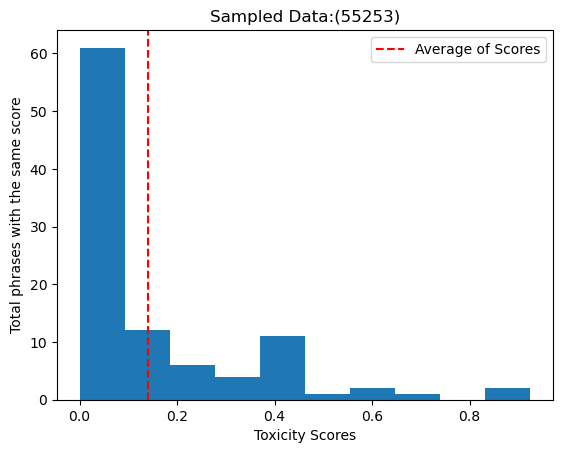

In [5]:
import matplotlib.pyplot as plt
query = comment_text.nlargest(55254, 'toxicity_score')
avg_score = np.mean(query['toxicity_score'])
plt.hist(query['toxicity_score'])
plt.axvline(x=avg_score, color='r', linestyle='--', label='Average of Scores')
plt.xlabel('Toxicity Scores')
plt.ylabel('Total phrases with the same score')
plt.title('Sampled Data:(55253)')
plt.legend()
plt.show()

In [6]:
high_toxicity = comment_text.loc[comment_text['toxicity_score'] > 0.5]
print("Toxicity scores over 0.5:")
print(high_toxicity)

Toxicity scores over 0.5:
    Unnamed: 0                id  \
8           21  00091c35fa9d0465   
25          56  0016b94c8b20ffa6   
34          76  001d739c97bc2ae4   
36          81  001eff4007dbb65b   
51         121  0030e3ba49006440   
71         194  00531c5e44a0f7b1   

                                         comment_text toxic  toxicity_score  
8    Arabs are committing genocide in Iraq but no ...   yes        0.718943  
25  I WILL BURN YOU TO HELL IF YOU REVOKE MY TALK ...    no        0.924899  
34  How dare you vandalize that page about the HMS...   yes        0.572199  
36  No he is an arrogant self serving immature idi...   yes        0.877870  
51  This is just bizarre Ani Medjools abuse of wik...    no        0.519808  
71                            WHAT THE HELL    Justin    no        0.571686  
